In [1]:
from nltk import word_tokenize , sent_tokenize , WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import string
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("D:/NLP Text data")
print(os.listdir())

['BJT.txt', 'IMDB Dataset.csv', 'Mosfet.txt', 'Solid state devices.txt', 'Transistor as amplifier.txt']


In [3]:
data = pd.read_csv("IMDB Dataset.csv")
print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [4]:
def preprocessing(text) :
    punc = set(string.punctuation)
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    big_tokens = sent_tokenize(str(text))
    preprocessed = []
    for i in big_tokens :
        small_tokens = word_tokenize(i)
        filterd = [ lemmatizer.lemmatize(i.lower()) for i in small_tokens if ( i not in stop_words) and ( i not in punc) and (i.isdigit() == 0)]
        preprocessed.append(" ".join(filterd))
    return " ".join(preprocessed)
data["review_processed"] = data['review'].apply(preprocessing)

In [5]:
print(data)

                                                  review sentiment  \
0      One of the other reviewers has mentioned that ...  positive   
1      A wonderful little production. <br /><br />The...  positive   
2      I thought this was a wonderful way to spend ti...  positive   
3      Basically there's a family where a little boy ...  negative   
4      Petter Mattei's "Love in the Time of Money" is...  positive   
...                                                  ...       ...   
49995  I thought this movie did a down right good job...  positive   
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative   
49997  I am a Catholic taught in parochial elementary...  negative   
49998  I'm going to have to disagree with the previou...  negative   
49999  No one expects the Star Trek movies to be high...  negative   

                                        review_processed  
0      one reviewer mentioned watching oz episode 'll...  
1      a wonderful little production br b

In [6]:
def countvalue(pandas_Series , value) :
    series = np.array(pandas_Series)
    return np.count_nonzero(series == value)
count_positive = countvalue(data["sentiment"],"positive")
count_negative = countvalue(data["sentiment"],"negative")
print(f"positive_value = {count_positive}")
print(f"negative_value = { count_negative}")

positive_value = 25000
negative_value = 25000


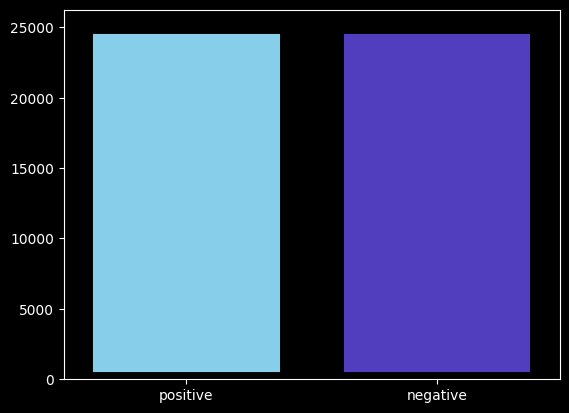

In [7]:
plt.style.use("dark_background")
plt.bar(["positive","negative"],[count_positive,count_negative],
        color=["skyblue","#513ebe"],edgecolor="black",linewidth=10)
plt.show()

In [8]:
def countwords(text) :
    tokenss = word_tokenize(text)
    return len(tokenss)
data["count_of_words_after"] = data["review_processed"].apply(countwords)

In [9]:
print(data)

                                                  review sentiment  \
0      One of the other reviewers has mentioned that ...  positive   
1      A wonderful little production. <br /><br />The...  positive   
2      I thought this was a wonderful way to spend ti...  positive   
3      Basically there's a family where a little boy ...  negative   
4      Petter Mattei's "Love in the Time of Money" is...  positive   
...                                                  ...       ...   
49995  I thought this movie did a down right good job...  positive   
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative   
49997  I am a Catholic taught in parochial elementary...  negative   
49998  I'm going to have to disagree with the previou...  negative   
49999  No one expects the Star Trek movies to be high...  negative   

                                        review_processed  count_of_words_after  
0      one reviewer mentioned watching oz episode 'll...                   198

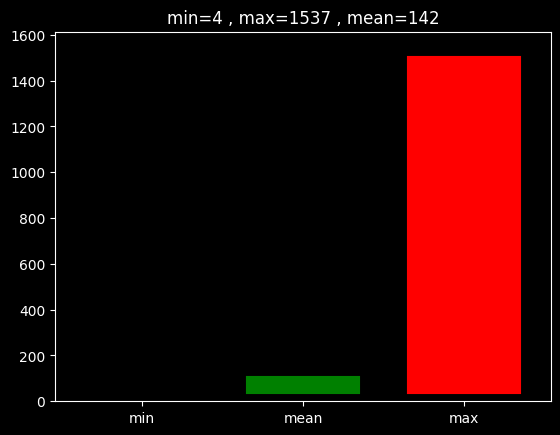

In [16]:
counts = np.array(data.iloc[:,-1])
mx , mn , me = np.max(counts) , np.min(counts) , int(np.mean(counts))
plt.bar(["min","mean","max"],[mn,me,mx],color=["yellow","green","red"],edgecolor="black",linewidth=10)
plt.title(f"min={mn} , max={mx} , mean={me}")
plt.show()

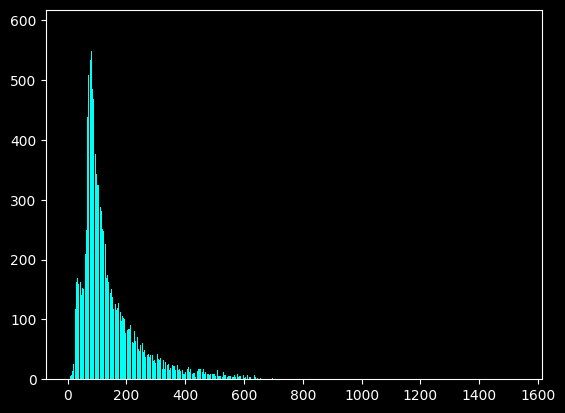

In [31]:
uniq = list(np.unique(counts))
dic = dict()
for i in uniq :
    dic.update({i.item() : np.count_nonzero(counts == i)})
plt.bar(list(dic.keys()) , list(dic.values()) , color="#00fff4")
plt.show()